In [1]:
import pandas as pd
import numpy as np
import h5py

In [2]:
with h5py.File('../data/TCGA_source/tcga_raw_counts.h5','r') as hdf:
    base_items = list(hdf.items())
    print("Items in the base directory: \n", base_items)
    data_group = hdf.get("meta")
    data_group_items = list(data_group.items())
    print("Items in data group:")
    for elem in data_group_items:
        print (elem)

Items in the base directory: 
 [('data', <HDF5 group "/data" (1 members)>), ('info', <HDF5 group "/info" (5 members)>), ('meta', <HDF5 group "/meta" (67 members)>)]
Items in data group:
('auc', <HDF5 dataset "auc": shape (11284,), type "|S12">)
('bigwig_file', <HDF5 dataset "bigwig_file": shape (11284,), type "|S40">)
('cancertype', <HDF5 dataset "cancertype": shape (11284,), type "|S65">)
('gdc_annotations', <HDF5 dataset "gdc_annotations": shape (11284,), type "|S41921">)
('gdc_cases.annotations', <HDF5 dataset "gdc_cases.annotations": shape (11284,), type "|S2270">)
('gdc_cases.case_id', <HDF5 dataset "gdc_cases.case_id": shape (11284,), type "|S37">)
('gdc_cases.project.name', <HDF5 dataset "gdc_cases.project.name": shape (11284,), type "|S65">)
('gdc_cases.project.primary_site', <HDF5 dataset "gdc_cases.project.primary_site": shape (11284,), type "|S14">)
('gdc_cases.project.project_id', <HDF5 dataset "gdc_cases.project.project_id": shape (11284,), type "|S10">)
('gdc_cases.sample

In [3]:
with h5py.File('../data/TCGA_source/tcga_raw_counts.h5','r') as hdf:
    sample_id = [x.decode() for x in hdf["/meta/sampleid"]]
    gdc_id = [x.decode() for x in hdf["/meta/gdc_file_id"]]
    cancer_type = [x.decode() for x in hdf["/meta/cancertype"]]

In [4]:
with h5py.File('../data/TCGA_source/tcga_raw_counts.h5','r') as hdf:
    data_array = np.array(hdf["/data/expression"])
    indexes = [x.decode() for x in hdf["/meta/genes"]]
    data = pd.DataFrame(data_array, columns=indexes)

In [5]:
sample_id_df = pd.DataFrame(sample_id, columns=["sample_id"])

In [6]:
cancer_type_df = pd.DataFrame(cancer_type, columns=["cancer_type"])

## Filter common genes

In [7]:
archs4 = pd.read_pickle("../data/archs4.pkl")

In [8]:
archs4_genes = archs4.columns.values
tcga_raw_genes = data.columns.values

In [9]:
common_genes = np.intersect1d(archs4_genes, tcga_raw_genes)

In [10]:
len(common_genes)

19036

In [11]:
archs4_19036 = archs4[common_genes]
tcga_raw_19036 = data[common_genes]

In [12]:
tcga_raw_19036 = pd.concat([sample_id_df, cancer_type_df, tcga_raw_19036], axis=1)

In [13]:
tcga_raw_19036

,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,3DFF72D2-F292-497E-ACE3-6FAA9C884205,Liver Hepatocellular Carcinoma,1454762,316636,641105,0,630,50,12380,0,...,9345,19795,3579,8192,46912,621,53209,302428,29863,44717
1,B1E54366-42B9-463C-8615-B34D52BD14DC,Prostate Adenocarcinoma,28886,192,2361023,10757,1538,10,238345,0,...,26355,21156,11269,55211,100123,6864,90816,1009426,156109,108371
2,473713F7-EB41-4F20-A37F-ACD209E3CB75,Rectum Adenocarcinoma,4322,154254,2025563,104,1421,160,129069,132,...,150203,252841,50985,184511,119044,458,203733,1319876,348923,253112
3,11F18F54-9B33-4C33-BDF9-0F093F4F3336,Liver Hepatocellular Carcinoma,23043947,983141,15232711,242,15854,2,69336,0,...,25389,21800,6888,39201,126221,6045,315638,83030,165945,175660
4,136B7576-1108-4FA3-8254-6069F0CA879A,Bladder Urothelial Carcinoma,3273,270,719684,163497,296,0,196089,0,...,221120,633127,13853,44655,140114,4662,205856,1290436,131672,211360
5,E81FA8B7-3FFE-4F73-94AF-0B5257D7F81A,Brain Lower Grade Glioma,25637,136,2021283,193639,10349,178,26296,96,...,28685,37137,21780,78963,154577,191,283354,367770,299553,199810
6,1AB92ADA-637E-4A42-A39A-70CEEEA41AE3,Breast Invasive Carcinoma,43249,9,2266509,1239,2090,88,30421,324,...,105095,186218,49679,160374,139186,6232,256256,558240,479727,326981
7,46C422D1-E1A1-42E5-8FB1-918C0DAE533D,Uterine Corpus Endometrial Carcinoma,13269,0,1423402,1316,1866,0,165370,0,...,8679,24460,2117,4382,56992,300,9607,1281878,104287,27475
8,D30CF518-5FC6-4A54-8D5D-BA420EA1836D,Sarcoma,16823,275,10274439,485,667,34,129340,164,...,126281,273796,38012,96400,118702,574,429027,2832599,186949,211155
9,C5300AA5-0115-43AC-ACBE-C4E33C6E41B8,Kidney Renal Clear Cell Carcinoma,17744,207609,11230968,1247,14918,296,589105,15487,...,30777,81195,32096,61847,261881,5178,218125,1307269,405765,240686


### Translating tcga_raw_counts UUID to TCGA ID

In [14]:
translation_table = pd.read_csv("../data/uuid_tcga_translate.csv")

In [15]:
tcga_id_long = pd.DataFrame(translation_table["gdc_cases.samples.portions.submitter_id"].values, columns=["tcga_id"])
# tcga_id = pd.DataFrame(tcga_id_long.apply(lambda x: x.str[:12]), columns=["tcga_id"])

In [17]:
final_tcga_raw_19036 = pd.concat([tcga_id_long, tcga_raw_19036], axis=1)

In [18]:
final_tcga_raw_19036.to_pickle("../data/tcga_raw_19036.pkl")

### Saving ARCHS4 as well

In [34]:
archs4_19036.to_pickle("../data/archs4_19036.pkl")

### Filtering common_genes for ARCHS4 BRCA subset

In [19]:
archs4_brca = pd.read_pickle("../data/archs4_brca.pkl")

In [38]:
archs4_brca = archs4_brca[common_genes]

In [40]:
archs4_brca.to_pickle("../data/archs4_brca_19036.pkl")



# Matching BRCA subtype labels to tcga_raw


In [97]:
tcga_raw_19036 = pd.read_pickle("../data/tcga_raw_19036.pkl")
brca_train = pd.read_csv("../data/TCGA_source/TCGA817-FULL_SET.csv")

In [98]:
brca_train = brca_train[["TCGA_ID", "Ciriello_subtype"]]

In [99]:
brca_train = brca_train.rename(index=str, columns={"TCGA_ID": "tcga_id"})

In [100]:
brca_train["tcga_id"] = brca_train["tcga_id"].apply(lambda x: x[:12])

In [101]:
tcga_raw_19036.sort_values(by="tcga_id", inplace=True)

In [102]:
tcga_raw_19036[tcga_raw_19036["tcga_id"].str.contains("TCGA-A7-A13G")]

,tcga_id,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
4837,TCGA-A7-A13G-01A-11,BD9F2A8C-9E65-4AA9-88C9-70DFDDEDD82E,Breast Invasive Carcinoma,27851,8633,1382920,4201,1917,111,19115,...,102422,69801,89782,197702,218465,61900,739302,65386,802206,1002270
4841,TCGA-A7-A13G-01A-11,29635F4D-3149-49BC-B960-FF863D10F747,Breast Invasive Carcinoma,66964,2335,1689572,3247,1638,230,52189,...,122792,162735,56928,206814,346476,40136,389012,704306,841803,595840
4838,TCGA-A7-A13G-01B-04,AF7561DA-6F36-4509-BFED-4DF29E489315,Breast Invasive Carcinoma,17576,5106,739004,5664,3175,259,8892,...,21917,13573,25971,43990,147163,21533,111243,128295,474729,237064
4839,TCGA-A7-A13G-01B-04,F345B65F-B055-4714-BE04-8AA66320AD4F,Breast Invasive Carcinoma,7215,3314,458290,5002,2874,68,4530,...,11288,10987,10878,25576,76545,10876,55031,134954,244625,162453
4840,TCGA-A7-A13G-01B-04,1FD27945-2143-48BE-9C77-DD82322863AD,Breast Invasive Carcinoma,32471,7292,1430508,10596,6863,918,20019,...,44158,27678,53773,83704,279624,37060,211458,242612,921276,472197
4842,TCGA-A7-A13G-11A-51,A8099400-B1DC-471C-8C6A-95CEADB6869A,Breast Invasive Carcinoma,4512,121,11577622,1596,9745,72,114618,...,36881,11037,56141,118743,194289,1716,616631,639509,474212,232884


In [103]:
tcga_raw_19036["tcga_id"] = tcga_raw_19036["tcga_id"].apply(lambda x: x[:12])

In [104]:
tcga_raw_19036.drop_duplicates(subset="tcga_id", keep="first", inplace=True)

In [105]:
tcga_raw_19036

,tcga_id,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
2685,TCGA-02-0047,2DAB6792-F9AF-4565-BDD5-C9802F3132F4,Glioblastoma Multiforme,47924,256,9987140,14959,14232,807,13070,...,87481,121436,38144,91325,142313,155,334036,1181473,407506,203294
9580,TCGA-02-0055,5307FA7F-DFE5-42BC-BFC7-826AACAAE799,Glioblastoma Multiforme,138113,378,13815228,1311,1994,806,160686,...,152548,81400,23672,78847,105754,2584,282661,3732443,201343,260156
7178,TCGA-02-2483,AFE5BFD1-AA9F-470A-A44F-341126F8057D,Glioblastoma Multiforme,131640,114,8930865,2394,4588,211,36411,...,281404,279668,15257,154988,186319,19536,479051,2136407,336668,339453
3653,TCGA-02-2485,6B8CAF74-45C6-4C20-8126-A99F73346198,Glioblastoma Multiforme,30500,199,2936885,82344,3791,1489,59225,...,164730,165642,36350,92718,362482,295,384303,1920911,412933,313308
5401,TCGA-02-2486,B8AED170-C88C-4A86-8377-93B5D14AB334,Glioblastoma Multiforme,34130,287,12044715,37601,2521,354,13003,...,59130,23217,18377,51784,113120,119,192049,2252417,183284,186551
4851,TCGA-04-1331,FDB9F3D8-93F2-4710-A5FF-D414DB4A2282,Ovarian Serous Cystadenocarcinoma,144310,444,2747913,100715,2251,232,202075,...,147582,667545,37129,162577,335113,67062,743201,2713851,339884,443415
7982,TCGA-04-1332,A81614ED-14CB-4EBC-988E-F67FBCBF62D8,Ovarian Serous Cystadenocarcinoma,23184,205,3779850,55355,3391,1168,204906,...,96831,120912,41982,100976,207243,5912,165812,2660417,494226,103987
9177,TCGA-04-1337,D95632A2-EAC0-4CCE-BA3F-DC2BF563D344,Ovarian Serous Cystadenocarcinoma,115303,328,4227056,1427,4141,1261,292259,...,193338,368680,37264,143115,455720,60479,329311,10783959,664085,361519
2170,TCGA-04-1338,DF8B4E19-8C78-4A68-8FAE-DFF01076BC97,Ovarian Serous Cystadenocarcinoma,25234,386,679853,34184,721,112,39308,...,54357,105281,8780,42169,101402,3629,163772,2700700,115641,80775
6458,TCGA-04-1341,5B41C173-0A28-498B-8245-18C35D31ECCC,Ovarian Serous Cystadenocarcinoma,184075,564,713947,6385,2385,474,136636,...,131245,500200,31315,136387,316344,10756,147176,9311532,392373,167205


In [106]:
merged = pd.merge(brca_train, tcga_raw_19036, on="tcga_id")

In [107]:
merged[merged["tcga_id"]=="TCGA-A7-A13G"]

,tcga_id,Ciriello_subtype,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
389,TCGA-A7-A13G,LumA,BD9F2A8C-9E65-4AA9-88C9-70DFDDEDD82E,Breast Invasive Carcinoma,27851,8633,1382920,4201,1917,111,...,102422,69801,89782,197702,218465,61900,739302,65386,802206,1002270


In [108]:
len(np.intersect1d(brca_train["tcga_id"].values, tcga_raw_19036["tcga_id"].values))

817

In [109]:
merged.to_pickle("../data/tcga_brca_raw_19036_train.pkl")

## Do the same for test set

In [110]:
tcga_raw_19036 = pd.read_pickle("../data/tcga_raw_19036.pkl")
brca_test = pd.read_csv("../data/TCGA_source/PAN CANCER ATLAS TCGA- FINAL TEST SET-236.csv")

In [111]:
brca_test = brca_test[["TCGA_ID", "expert_PAM50_subtypes"]]

In [112]:
brca_test = brca_test.rename(index=str, columns={"TCGA_ID": "tcga_id", "expert_PAM50_subtypes": "subtype"})

In [113]:
brca_test["tcga_id"] = brca_test["tcga_id"].apply(lambda x: x[:12])

In [114]:
tcga_raw_19036.sort_values(by="tcga_id", inplace=True)

In [115]:
tcga_raw_19036["tcga_id"] = tcga_raw_19036["tcga_id"].apply(lambda x: x[:12])

In [116]:
tcga_raw_19036.drop_duplicates(subset="tcga_id", keep="first", inplace=True)

In [117]:
merged2 = pd.merge(brca_test, tcga_raw_19036, on="tcga_id")

In [118]:
merged2

,tcga_id,subtype,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU,LumA,1CBCD09F-2824-4E99-B657-F9565E9C9372,Breast Invasive Carcinoma,57898,134,1697402,1737,568,0,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
1,TCGA-3C-AALI,Her2,58FB7633-DF82-406F-B4CB-277BE8DE003D,Breast Invasive Carcinoma,52146,1361,1403901,1636,1357,41,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
2,TCGA-3C-AALJ,LumB,F7B0D141-4D33-4A6E-8E05-08F7CF325459,Breast Invasive Carcinoma,52172,510,989281,282,1974,119,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
3,TCGA-3C-AALK,LumA,22CB86F1-88B4-405A-B20F-A29694950367,Breast Invasive Carcinoma,50517,287,2674831,816,2084,172,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
4,TCGA-4H-AAAK,LumA,71F8A28D-077A-4A91-B56E-B035E4861E9C,Breast Invasive Carcinoma,66433,192,2279532,1603,2425,246,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179
5,TCGA-5L-AAT0,LumA,CBF5849B-94EA-495E-9247-3012BAA96267,Breast Invasive Carcinoma,37706,0,2124383,786,3178,64,...,58580,77877,24890,104876,128500,3540,111353,720490,160909,213280
6,TCGA-5T-A9QA,LumB,CFE5897C-B243-45E6-8B2A-1722EDCDE416,Breast Invasive Carcinoma,63038,3056,617751,57,297,0,...,91759,336956,11365,53301,109193,720,63627,623722,216494,101057
7,TCGA-A1-A0SG,LumA,E286F56A-1719-409F-823C-DA63DA424F68,Breast Invasive Carcinoma,53115,0,3710421,1939,1651,0,...,97738,176186,32031,118240,198826,797,212597,878755,511286,199313
8,TCGA-A1-A0SO,Basal,0A60E43D-2BDB-4DC1-B9F3-336C89C2272F,Breast Invasive Carcinoma,124440,257,1638779,13773,17120,2475,...,457807,411027,57290,206204,89237,49314,717630,539477,329536,371672
9,TCGA-A2-A0CX,Her2,FFEA5A94-3FF5-435D-A24F-EBF0B3674683,Breast Invasive Carcinoma,23022,347,4193849,321865,1952,102,...,125815,362868,27552,106140,185658,146031,397327,1176640,207110,188463


In [119]:
len(np.intersect1d(brca_test["tcga_id"].values, tcga_raw_19036["tcga_id"].values))

236

In [96]:
merged.to_pickle("../data/tcga_brca_raw_19036_test.pkl")

In [124]:
train_ids = merged["tcga_id"].values

In [125]:
test_ids = merged2["tcga_id"].values

In [126]:
test_ids

array(['TCGA-3C-AAAU', 'TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK',
       'TCGA-4H-AAAK', 'TCGA-5L-AAT0', 'TCGA-5T-A9QA', 'TCGA-A1-A0SG',
       'TCGA-A1-A0SO', 'TCGA-A2-A0CX', 'TCGA-A2-A0D1', 'TCGA-A2-A0YE',
       'TCGA-A2-A0YJ', 'TCGA-A2-A4S1', 'TCGA-A7-A56D', 'TCGA-A7-A6VV',
       'TCGA-A7-A6VW', 'TCGA-A7-A6VX', 'TCGA-A7-A6VY', 'TCGA-A8-A06X',
       'TCGA-A8-A07Z', 'TCGA-A8-A08A', 'TCGA-A8-A08P', 'TCGA-A8-A09V',
       'TCGA-A8-A09W', 'TCGA-A8-A0A6', 'TCGA-A8-A0AB', 'TCGA-AC-A3QQ',
       'TCGA-AC-A3YJ', 'TCGA-AC-A4ZE', 'TCGA-AC-A5EH', 'TCGA-AC-A5XU',
       'TCGA-AC-A62X', 'TCGA-AC-A6IV', 'TCGA-AC-A6IW', 'TCGA-AC-A6IX',
       'TCGA-AC-A6NO', 'TCGA-AC-A7VB', 'TCGA-AC-A7VC', 'TCGA-AC-A8OP',
       'TCGA-AC-A8OQ', 'TCGA-AC-A8OR', 'TCGA-AC-A8OS', 'TCGA-AN-A03X',
       'TCGA-AN-A03Y', 'TCGA-AN-A041', 'TCGA-AN-A046', 'TCGA-AN-A049',
       'TCGA-AN-A04A', 'TCGA-AN-A04C', 'TCGA-AN-A0AR', 'TCGA-AN-A0FD',
       'TCGA-AN-A0XL', 'TCGA-AN-A0XN', 'TCGA-AN-A0XO', 'TCGA-AN-A0XP',
      

In [128]:
used_ids = np.concatenate((train_ids, test_ids))

In [129]:
len(used_ids)

1053

In [132]:
len(train_ids)+len(test_ids)

1053

In [140]:
cond = ~tcga_raw_19036['tcga_id'].isin(used_ids)

In [142]:
tcga_raw_no_brca = tcga_raw_19036.loc[cond]

In [148]:
tcga_raw_no_brca.to_pickle("../data/tcga_raw_no_labelled_brca_19036.pkl")

# Now that we have all our data, we normalize!

### First by row, dividing by the sum of each row

In [2]:
tcga_raw_no_brca = pd.read_pickle("../data/tcga_raw_no_labelled_brca_19036.pkl")

In [3]:
tcga_raw_no_brca_meta = tcga_raw_no_brca[["tcga_id", "sample_id", "cancer_type"]]
tcga_raw_no_brca.drop(["tcga_id", "sample_id", "cancer_type"], axis=1, inplace=True)

In [4]:
tcga_raw_no_brca_1000000 = tcga_raw_no_brca.astype("object")*1000*1000

In [5]:
tcga_raw_no_brca_norm = (tcga_raw_no_brca_1000000).div(tcga_raw_no_brca.sum(axis=1), axis=0)

In [6]:
tcga_raw_no_brca_norm

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
2685,7.77811,0.0415491,1620.92,2.42786,2.30987,0.130977,2.12127,0.0694648,26.7978,24.4153,...,14.1983,19.7092,6.19081,14.8221,23.0975,0.0251567,54.2144,191.754,66.1386,32.9948
9580,18.9256,0.0517974,1893.1,0.179647,0.273238,0.110446,22.0188,0.0509752,30.2981,14.3192,...,20.9037,11.1543,3.24378,10.8044,14.4915,0.354086,38.7331,511.457,27.5901,35.6492
7178,16.0906,0.0139344,1091.64,0.292623,0.5608,0.0257909,4.45059,0.0239574,61.8669,25.2482,...,34.3965,34.1843,1.86489,18.9445,22.7741,2.38792,58.5553,261.137,41.1516,41.492
3653,4.05655,0.0264673,390.61,10.9519,0.504209,0.198039,7.87702,0.0202162,56.1742,15.4681,...,21.9094,22.0306,4.83461,12.3316,48.2107,0.0392355,51.1129,255.484,54.9207,41.6705
5401,5.05779,0.0425311,1784.93,5.57217,0.373592,0.05246,1.92694,0.000444576,36.5716,16.9511,...,8.76259,3.44057,2.72332,7.67397,16.7635,0.0176348,28.4601,333.79,27.1612,27.6454
4851,17.1771,0.0528491,327.083,11.9881,0.267935,0.0276148,24.0529,0.144026,81.2445,33.8766,...,17.5666,79.4576,4.41945,19.3515,39.8883,7.98236,88.4629,323.028,40.4562,52.7795
7982,3.89513,0.0344419,635.05,9.30015,0.569719,0.196235,34.4261,0.168513,54.8142,40.7449,...,16.2685,20.3143,7.05337,16.9649,34.8187,0.993271,27.858,446.975,83.0346,17.4708
9177,7.16764,0.0203896,262.769,0.0887073,0.257419,0.0783882,18.1678,0.0957318,70.0776,37.5911,...,12.0186,22.9184,2.31646,8.89653,28.3292,3.75959,20.4711,670.369,41.2819,22.4733
2170,6.40968,0.0980477,172.689,8.68306,0.183141,0.0284491,9.98461,0.0381014,47.0281,14.0409,...,13.8072,26.7424,2.2302,10.7113,25.7571,0.921801,41.5996,686.003,29.3739,20.5176
6458,13.6373,0.0417842,52.8932,0.473036,0.176694,0.0351165,10.1228,0.00185214,100.591,52.8726,...,9.72336,37.0576,2.31999,10.1043,23.4365,0.796864,10.9036,689.85,29.0692,12.3875


In [17]:
tcga_raw_no_brca_norm = tcga_raw_no_brca_norm.astype("float64")

In [19]:
tcga_raw_no_brca_norm_with_meta = pd.concat([tcga_raw_no_brca_meta, tcga_raw_no_brca_norm], axis=1)

In [20]:
tcga_raw_no_brca_norm_with_meta.to_pickle("../data/tcga_raw_no_labelled_brca_row_normalized.pkl")

In [22]:
tcga_raw_no_brca_log_norm = tcga_raw_no_brca_norm.apply(lambda x: np.log2(x+1))

In [24]:
tcga_raw_no_brca_log_norm.to_pickle("../data/tcga_raw_no_labelled_brca_log_row_normalized.pkl")

### Handle ARCHS4 now

In [2]:
archs4_full = pd.read_pickle("../data/archs4_full_19036.pkl")

In [3]:
archs4_full = archs4_full.astype("int64")

In [6]:
archs4_full_1000000 = archs4_full*1000*1000

In [7]:
archs4_full_1000000

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,124000000,77000000,10742000000,27000000,119000000,25000000,2328000000,2000000,2838000000,2789000000,...,4649000000,6643000000,160000000,803000000,1333000000,1545000000,2334000000,14606000000,7551000000,3867000000
1,0,0,189000000,6000000,0,0,0,0,0,9000000,...,0,0,0,0,1000000,0,10000000,1000000,32000000,10000000
2,0,0,1518000000,0,0,0,0,0,0,14000000,...,0,4000000,0,0,8000000,0,33000000,12000000,77000000,24000000
3,0,0,1873000000,0,0,0,0,0,0,17000000,...,0,31000000,0,0,4000000,0,3000000,40000000,62000000,24000000
4,109000000,56000000,26007000000,20000000,70000000,38000000,2374000000,0,2983000000,3067000000,...,6045000000,9508000000,156000000,902000000,1436000000,1626000000,2733000000,10553000000,7196000000,5093000000
5,0,0,835000000,0,0,0,0,0,0,15000000,...,0,4000000,0,0,24000000,0,7000000,4000000,89000000,34000000
6,0,0,1077000000,0,0,0,0,0,0,29000000,...,0,18000000,0,0,36000000,5000000,4000000,16000000,39000000,8000000
7,0,0,6362000000,0,0,0,0,0,0,1000000,...,0,8000000,0,0,16000000,0,4000000,6000000,40000000,15000000
8,0,0,545000000,0,0,0,0,0,0,14000000,...,0,5000000,0,0,34000000,2000000,5000000,5000000,94000000,37000000
9,0,0,1100000000,0,0,0,0,0,0,17000000,...,0,7000000,0,0,10000000,2000000,4000000,25000000,72000000,18000000


In [8]:
archs4_full_norm = archs4_full_1000000.div(archs4_full.sum(axis=1), axis=0)

In [11]:
archs4_full_norm.to_pickle("../data/archs4_full_19036_row_normalized.pkl")

In [13]:
archs4_full_log_norm = archs4_full_norm.apply(lambda x: np.log2(x+1))

In [15]:
archs4_full_log_norm.to_pickle("../data/archs4_full_19036_row_log_normalized.pkl")

### Handle tcga_raw brca now

In [2]:
tcga_brca_train = pd.read_pickle("../data/tcga_brca_raw_19036_train.pkl")
tcga_brca_test = pd.read_pickle("../data/tcga_brca_raw_19036_test.pkl")

In [3]:
tcga_brca_train

,tcga_id,Ciriello_subtype,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-A1-A0SK,Basal,57DABE72-0950-4301-BE03-262F3916DBB1,Breast Invasive Carcinoma,31484,132,1401642,11749,1973,1133,...,394506,594782,51567,190624,287959,61064,469386,201200,609839,532806
1,TCGA-A2-A04P,Basal,D06D5373-6A1B-474C-9279-10FCB29F59BA,Breast Invasive Carcinoma,24879,448,1940992,373426,3002,92,...,81540,264325,9499,36925,108102,47420,149234,921993,154447,162732
2,TCGA-A2-A0CM,Basal,64D0958D-EF53-43EC-8167-390D957485C4,Breast Invasive Carcinoma,15201,98,1914745,239327,1480,0,...,223059,321181,26701,79078,166436,74165,155550,1058895,252383,294370
3,TCGA-A2-A0D2,Basal,004E0C7A-A9F7-43AD-ACAC-52FB44F567FC,Breast Invasive Carcinoma,7703,50,11247837,571,5249,284,...,282882,713390,25949,111164,163604,59073,350568,3152818,222443,304314
4,TCGA-A2-A0ST,Basal,118D1959-5B7B-4D2C-9E9F-970613F0E133,Breast Invasive Carcinoma,28850,22,3794494,286263,6431,21,...,111615,141408,51047,140962,114829,31635,193465,985096,379776,315119
5,TCGA-A2-A0T0,Basal,56719FB4-48E8-4DC4-B3F0-6AADE70276AB,Breast Invasive Carcinoma,91059,395,1747107,131063,1175,246,...,79614,390816,19501,101927,233452,36802,330002,1126117,236836,157466
6,TCGA-A2-A0T2,Basal,E08283CA-68E0-4171-B8B9-51AEE0B1E0EF,Breast Invasive Carcinoma,128436,100,3309998,91213,1781,361,...,96183,164273,27775,74483,217814,64754,237153,1219799,152109,232261
7,TCGA-A2-A3XS,Basal,AA87E619-E232-4A3A-926A-4EA8F862DEE1,Breast Invasive Carcinoma,93915,190,4461541,268999,3589,473,...,207689,192595,28594,98412,349574,41165,204598,1165962,320365,323036
8,TCGA-A2-A3XT,Basal,7A532AB7-001D-4B99-9D30-DC67B7D847DB,Breast Invasive Carcinoma,52378,0,2720238,240987,19945,0,...,159196,282458,39663,120003,349292,5804,282567,1728984,353387,354450
9,TCGA-A2-A3XU,Basal,902392B1-7533-4751-A3B1-58955B3EEF91,Breast Invasive Carcinoma,52991,28,416450,232628,331,0,...,53088,184751,5126,43008,136206,23203,118371,1322344,129873,222497


In [4]:
tcga_brca_train_meta = tcga_brca_train[["tcga_id", "Ciriello_subtype", "sample_id", "cancer_type"]]
tcga_brca_train.drop(["tcga_id", "Ciriello_subtype", "sample_id", "cancer_type"], axis=1, inplace=True)

In [6]:
tcga_brca_train = tcga_brca_train.astype("int64")

In [7]:
tcga_brca_train_1000000 = tcga_brca_train*1000*1000

In [8]:
tcga_brca_train_norm = tcga_brca_train_1000000.div(tcga_brca_train.sum(axis=1), axis=0)

In [10]:
tcga_brca_train_norm_with_meta = pd.concat([tcga_brca_train_meta, tcga_brca_train_norm], axis=1)

In [11]:
tcga_brca_train_norm_with_meta.to_pickle("../data/tcga_brca_raw_19036_row_norm_train.pkl")

In [12]:
tcga_brca_train_log_norm = tcga_brca_train_norm.apply(lambda x: np.log2(x+1))

In [14]:
tcga_brca_train_log_norm_with_meta = pd.concat([tcga_brca_train_meta, tcga_brca_train_log_norm], axis=1)

In [16]:
tcga_brca_train_log_norm_with_meta.to_pickle("../data/tcga_brca_raw_19036_row_log_norm_train.pkl")

#### Same for test

In [17]:
tcga_brca_test

,tcga_id,subtype,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU,LumA,1CBCD09F-2824-4E99-B657-F9565E9C9372,Breast Invasive Carcinoma,57898,134,1697402,1737,568,0,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
1,TCGA-3C-AALI,Her2,58FB7633-DF82-406F-B4CB-277BE8DE003D,Breast Invasive Carcinoma,52146,1361,1403901,1636,1357,41,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
2,TCGA-3C-AALJ,LumB,F7B0D141-4D33-4A6E-8E05-08F7CF325459,Breast Invasive Carcinoma,52172,510,989281,282,1974,119,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
3,TCGA-3C-AALK,LumA,22CB86F1-88B4-405A-B20F-A29694950367,Breast Invasive Carcinoma,50517,287,2674831,816,2084,172,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
4,TCGA-4H-AAAK,LumA,71F8A28D-077A-4A91-B56E-B035E4861E9C,Breast Invasive Carcinoma,66433,192,2279532,1603,2425,246,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179
5,TCGA-5L-AAT0,LumA,CBF5849B-94EA-495E-9247-3012BAA96267,Breast Invasive Carcinoma,37706,0,2124383,786,3178,64,...,58580,77877,24890,104876,128500,3540,111353,720490,160909,213280
6,TCGA-5T-A9QA,LumB,CFE5897C-B243-45E6-8B2A-1722EDCDE416,Breast Invasive Carcinoma,63038,3056,617751,57,297,0,...,91759,336956,11365,53301,109193,720,63627,623722,216494,101057
7,TCGA-A1-A0SG,LumA,E286F56A-1719-409F-823C-DA63DA424F68,Breast Invasive Carcinoma,53115,0,3710421,1939,1651,0,...,97738,176186,32031,118240,198826,797,212597,878755,511286,199313
8,TCGA-A1-A0SO,Basal,0A60E43D-2BDB-4DC1-B9F3-336C89C2272F,Breast Invasive Carcinoma,124440,257,1638779,13773,17120,2475,...,457807,411027,57290,206204,89237,49314,717630,539477,329536,371672
9,TCGA-A2-A0CX,Her2,FFEA5A94-3FF5-435D-A24F-EBF0B3674683,Breast Invasive Carcinoma,23022,347,4193849,321865,1952,102,...,125815,362868,27552,106140,185658,146031,397327,1176640,207110,188463


In [18]:
tcga_brca_test_meta = tcga_brca_test[["tcga_id", "subtype", "sample_id", "cancer_type"]]
tcga_brca_test.drop(["tcga_id", "subtype", "sample_id", "cancer_type"], axis=1, inplace=True)

In [19]:
tcga_brca_test = tcga_brca_test.astype("int64")
tcga_brca_test_1000000 = tcga_brca_test*1000*1000

In [21]:
tcga_brca_test_norm = tcga_brca_test_1000000.div(tcga_brca_test.sum(axis=1), axis=0)

In [23]:
tcga_brca_test_norm_with_meta = pd.concat([tcga_brca_test_meta, tcga_brca_test_norm], axis=1)

In [25]:
tcga_brca_test_norm_with_meta.to_pickle("../data/tcga_brca_raw_19036_row_norm_test.pkl")

In [26]:
tcga_brca_test_log_norm = tcga_brca_test_norm.apply(lambda x: np.log2(x+1))

In [28]:
tcga_brca_test_log_norm_with_meta = pd.concat([tcga_brca_test_meta, tcga_brca_test_log_norm], axis=1)

In [29]:
tcga_brca_test_log_norm_with_meta

,tcga_id,subtype,sample_id,cancer_type,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU,LumA,1CBCD09F-2824-4E99-B657-F9565E9C9372,Breast Invasive Carcinoma,3.497528,0.033970,8.242223,0.388290,0.138803,0.000000,...,4.567296,5.691870,3.937222,5.626097,5.681502,4.000900,6.008093,7.557840,6.645893,6.206293
1,TCGA-3C-AALI,Her2,58FB7633-DF82-406F-B4CB-277BE8DE003D,Breast Invasive Carcinoma,3.891321,0.444873,8.545274,0.520223,0.443748,0.015613,...,5.929355,5.671528,2.897347,4.462490,5.887140,3.630205,4.953424,8.115251,6.059523,4.608662
2,TCGA-3C-AALJ,LumB,F7B0D141-4D33-4A6E-8E05-08F7CF325459,Breast Invasive Carcinoma,4.627335,0.300799,8.815987,0.174005,0.923950,0.076002,...,4.121627,7.067952,2.447379,4.728413,4.531598,4.292929,4.889808,8.129297,5.678453,5.011173
3,TCGA-3C-AALK,LumA,22CB86F1-88B4-405A-B20F-A29694950367,Breast Invasive Carcinoma,3.426836,0.077812,9.015357,0.211087,0.487894,0.047135,...,4.338196,5.075789,2.678619,4.336446,4.668490,3.364291,4.906769,8.081430,5.284074,5.352912
4,TCGA-4H-AAAK,LumA,71F8A28D-077A-4A91-B56E-B035E4861E9C,Breast Invasive Carcinoma,3.892817,0.056640,8.895996,0.416084,0.590459,0.072178,...,4.438037,5.200766,2.567688,4.385974,4.685163,1.019857,5.333096,7.668533,5.412756,5.709837
5,TCGA-5L-AAT0,LumA,CBF5849B-94EA-495E-9247-3012BAA96267,Breast Invasive Carcinoma,3.595241,0.000000,9.289054,0.299935,0.951850,0.026894,...,4.187679,4.578716,3.056204,4.992505,5.277233,1.029122,5.076322,7.733547,5.594197,5.993349
6,TCGA-5T-A9QA,LumB,CFE5897C-B243-45E6-8B2A-1722EDCDE416,Breast Invasive Carcinoma,4.278773,0.920310,7.503171,0.023819,0.120008,0.000000,...,4.796947,6.635317,2.110768,4.050228,5.039596,0.275341,4.291502,7.516973,6.005137,4.931412
7,TCGA-A1-A0SG,LumA,E286F56A-1719-409F-823C-DA63DA424F68,Breast Invasive Carcinoma,3.322324,0.000000,9.298977,0.409963,0.355960,0.000000,...,4.134725,4.947793,2.684618,4.395140,5.116867,0.182804,5.210786,7.228288,6.453856,5.120295
8,TCGA-A1-A0SO,Basal,0A60E43D-2BDB-4DC1-B9F3-336C89C2272F,Breast Invasive Carcinoma,4.228494,0.051928,7.874664,1.567594,1.782996,0.436106,...,6.050624,5.897593,3.196898,4.926272,3.778803,3.005836,6.691223,6.284147,5.584768,5.754950
9,TCGA-A2-A0CX,Her2,FFEA5A94-3FF5-435D-A24F-EBF0B3674683,Breast Invasive Carcinoma,2.356213,0.086923,9.553769,5.872931,0.432264,0.026099,...,4.555638,6.043136,2.568270,4.321630,5.097071,4.762091,6.172119,7.725081,5.250448,5.118078


In [30]:
tcga_brca_test_log_norm_with_meta.to_pickle("../data/tcga_brca_raw_19036_row_log_norm_test.pkl")

# Let's do some PCA analysis to see if the 2 data sets are similar after normalization

In [44]:
archs4 = pd.read_pickle("../data/archs4_full_19036_row_log_normalized.pkl")
tcga = pd.read_pickle("../data/tcga_raw_no_labelled_brca_log_row_normalized.pkl")
tcga_brca_train = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_train.pkl")
tcga_brca_test = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_test.pkl")

In [55]:
tcga_all = pd.concat([tcga, tcga_brca_train, tcga_brca_test], axis=0)

In [52]:
tcga_brca_train.drop(["tcga_id", "Ciriello_subtype", "sample_id", "cancer_type"], axis=1, inplace=True)
tcga_brca_test.drop(["tcga_id", "subtype", "sample_id", "cancer_type"], axis=1, inplace=True)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
archs4_comp = pca.fit_transform(archs4)
tcga_comp = pca.fit_transform(tcga_all)

In [57]:
archs4_comp_df = pd.DataFrame(archs4_comp, columns = ['principal component 1', 'principal component 2'])

In [58]:
tcga_comp_df = pd.DataFrame(tcga_comp, columns = ['principal component 1', 'principal component 2'])

In [59]:
import matplotlib.pyplot as plt

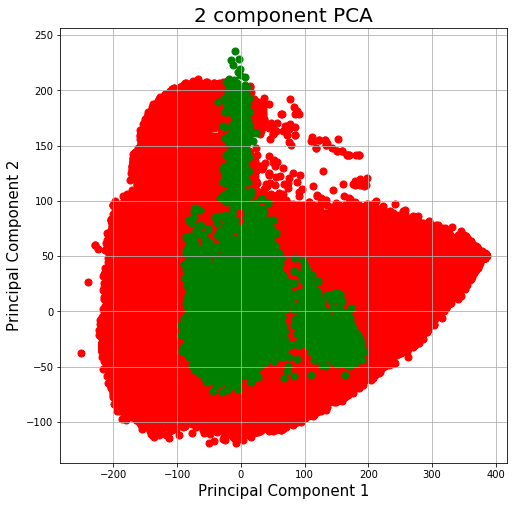

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(archs4_comp_df['principal component 1'] , archs4_comp_df['principal component 2'], c = 'r' , s = 50)
ax.scatter(tcga_comp_df['principal component 1'] , tcga_comp_df['principal component 2'], c = 'g' , s = 50)
ax.grid()

### The data sets seem to be compatible and so we can follow with our analysis